In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

In [2]:
df = pd.read_csv('data/Gold-Silver-GeopoliticalRisk_HistoricalData.csv',parse_dates=["DATE"], index_col="DATE")
df = df.sort_index(ascending=True)
df.head()

,GOLD_PRICE,GOLD_OPEN,GOLD_HIGH,GOLD_LOW,GOLD_CHANGE,SILVER_PRICE,SILVER_OPEN,SILVER_HIGH,SILVER_LOW,SILVER_CHANGE,GPRD,GPRD_ACT,GPRD_THREAT,EVENT
DATE,,,,,,,,,,,,,,
1985-01-02,305.5,305.5,305.5,305.5,-0.91,6.15,6.15,6.15,6.15,-3.30,115.68,146.77,87.44,NaN
1985-01-03,302.3,302.3,302.3,302.3,-1.05,6.09,6.09,6.09,6.09,-0.98,97.43,158.94,29.46,NaN
1985-01-04,303.1,303.1,303.1,303.1,0.26,6.03,6.03,6.03,6.03,-0.99,157.37,156.88,157.03,NaN
1985-01-07,298.2,298.2,298.2,298.2,-1.62,5.80,5.80,5.80,5.80,-3.81,105.31,57.27,143.30,NaN
1985-01-08,302.0,302.0,302.0,302.0,1.27,6.01,6.01,6.01,6.01,3.62,87.40,34.85,130.82,NaN


In [3]:
px.line(df,df.index,"GOLD_PRICE")

In [4]:
""" px.line(df,df.index,"SILVER_PRICE") """

' px.line(df,df.index,"SILVER_PRICE") '

array([[<Axes: title={'center': 'GOLD_PRICE'}>,
        <Axes: title={'center': 'GOLD_OPEN'}>,
        <Axes: title={'center': 'GOLD_HIGH'}>,
        <Axes: title={'center': 'GOLD_LOW'}>],
       [<Axes: title={'center': 'GOLD_CHANGE'}>,
        <Axes: title={'center': 'SILVER_PRICE'}>,
        <Axes: title={'center': 'SILVER_OPEN'}>,
        <Axes: title={'center': 'SILVER_HIGH'}>],
       [<Axes: title={'center': 'SILVER_LOW'}>,
        <Axes: title={'center': 'SILVER_CHANGE'}>,
        <Axes: title={'center': 'GPRD'}>,
        <Axes: title={'center': 'GPRD_ACT'}>],
       [<Axes: title={'center': 'GPRD_THREAT'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

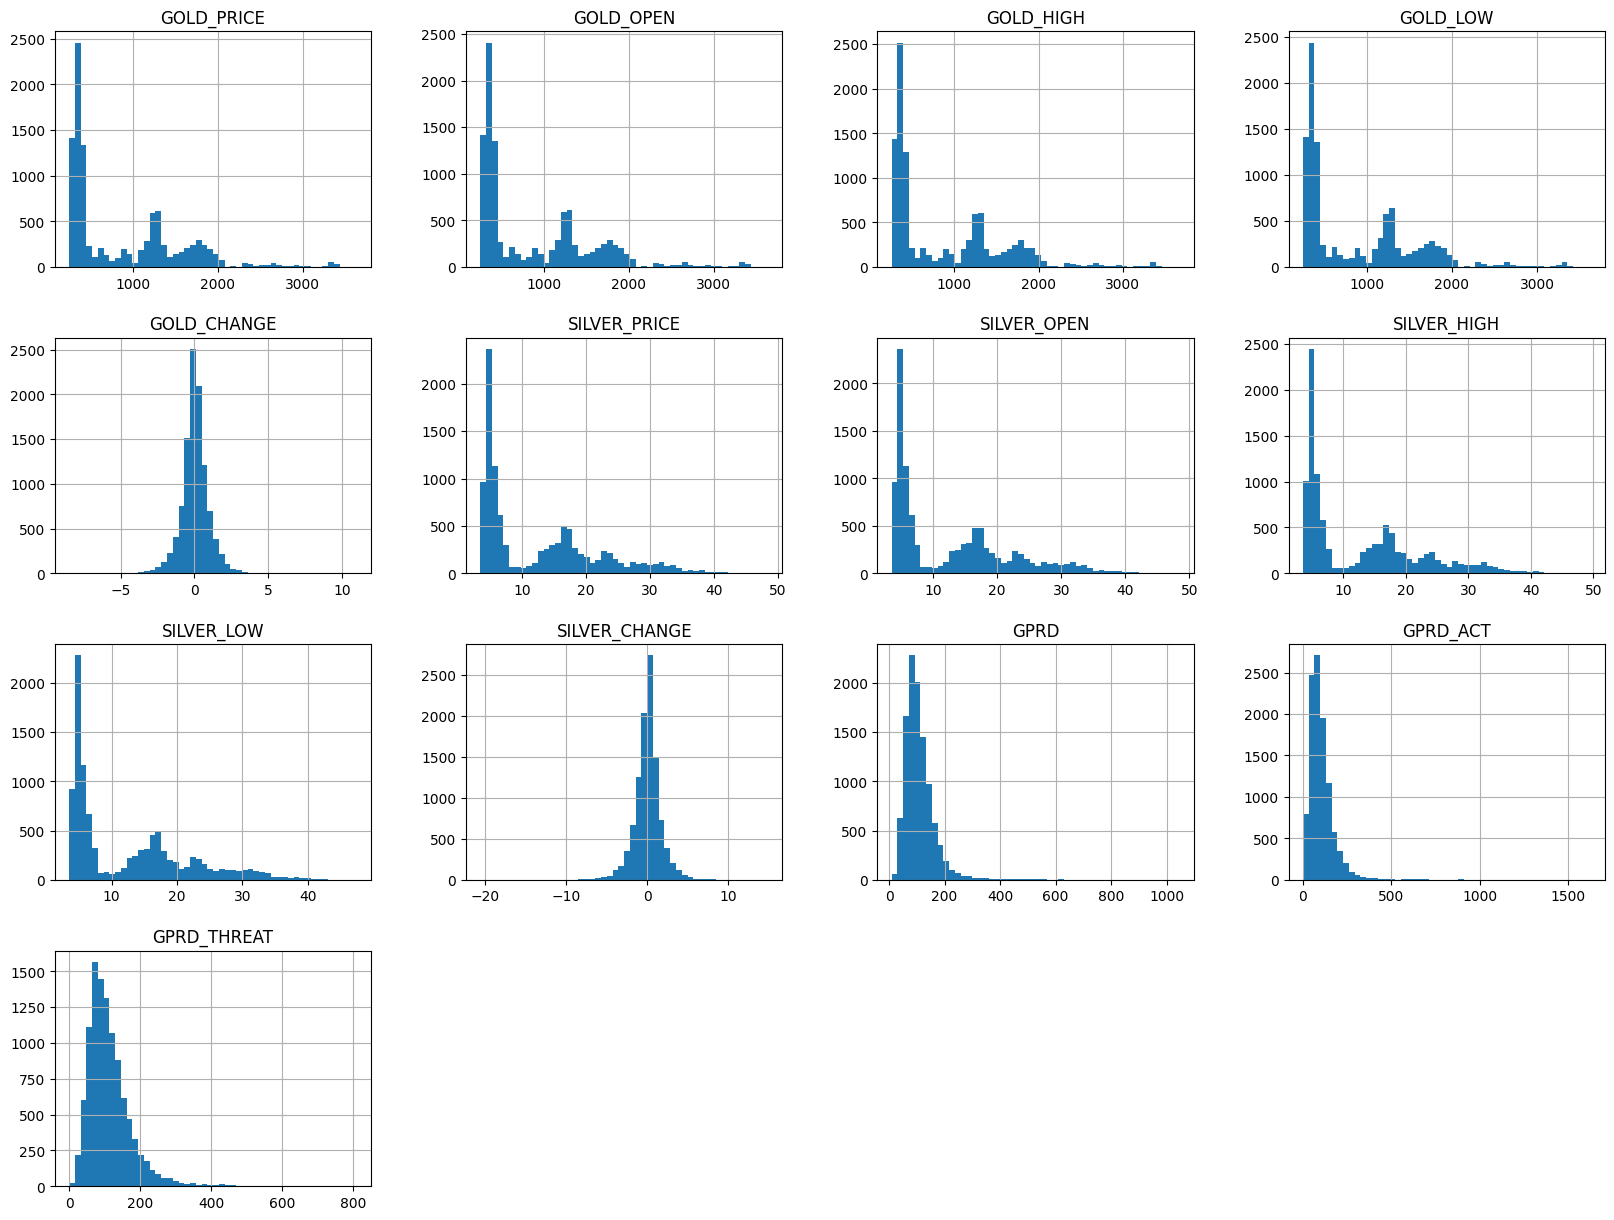

In [5]:
df.hist(bins=50,figsize=(20,15))

In [6]:
df.describe()

,GOLD_PRICE,GOLD_OPEN,GOLD_HIGH,GOLD_LOW,GOLD_CHANGE,SILVER_PRICE,SILVER_OPEN,SILVER_HIGH,SILVER_LOW,SILVER_CHANGE,GPRD,GPRD_ACT,GPRD_THREAT
count,10571.000000,10571.000000,10571.000000,10571.000000,10571.000000,10564.000000,10564.000000,10564.000000,10564.000000,10564.000000,10569.000000,10569.000000,10569.000000
mean,887.276856,887.412518,892.378187,881.901980,0.028118,12.825364,12.810967,12.967795,12.664810,0.033753,110.456114,106.908445,113.966142
std,666.189751,665.535068,671.811142,659.998671,0.976355,9.189963,9.184530,9.353250,9.010104,1.734102,62.347401,94.018143,65.015038
min,252.550000,252.350000,252.550000,252.550000,-8.490000,3.540000,3.530000,3.540000,3.530000,-20.540000,9.490000,0.000000,0.000000
25%,361.075000,362.150000,361.075000,361.075000,-0.430000,5.130000,5.130000,5.130000,5.130000,-0.750000,74.880000,58.240000,72.120000
50%,462.350000,464.620000,462.350000,462.350000,0.010000,7.635000,7.620000,7.635000,7.630000,0.000000,98.590000,88.240000,100.620000
75%,1312.045000,1312.345000,1320.130000,1305.395000,0.500000,18.140000,18.130000,18.395000,17.910000,0.880000,131.060000,130.360000,139.720000
max,3635.840000,3637.100000,3674.750000,3625.330000,11.000000,48.450000,48.420000,49.550000,47.520000,14.870000,1045.600000,1627.430000,809.490000


In [7]:
df = df.loc['2006-01-01':]

In [8]:
df['GOLD_VARIANCE'] = (df['GOLD_HIGH'] - df['GOLD_LOW']) / df['GOLD_LOW']
df['GPRD_CHANGE'] = df['GPRD'].pct_change()
df['GPRD_ACT_CHANGE'] = df['GPRD_ACT'].pct_change()
last_nonzero_grpd = df['GPRD_ACT'].replace(0, np.nan).ffill()
df['GPRD_ACT_CHANGE'] = (df['GPRD_ACT'] - last_nonzero_grpd.shift(1)) / last_nonzero_grpd.shift(1)
df['GPRD_THREAT_CHANGE'] = df['GPRD_THREAT'].pct_change()
last_nonzero_grpd = df['GPRD_THREAT'].replace(0, np.nan).ffill()
df['GPRD_THREAT_CHANGE'] = (df['GPRD_THREAT'] - last_nonzero_grpd.shift(1)) / last_nonzero_grpd.shift(1)
df['GOLD_CHANGE_PCT'] = df['GOLD_PRICE'].pct_change()

C:\Users\rohit\AppData\Local\Temp\ipykernel_17556\4110721120.py:2: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

C:\Users\rohit\AppData\Local\Temp\ipykernel_17556\4110721120.py:3: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

C:\Users\rohit\AppData\Local\Temp\ipykernel_17556\4110721120.py:6: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



In [9]:
px.line(df,df.index,"GOLD_VARIANCE")
px.line(df,df.index,df.GOLD_CHANGE_PCT)


array([[<Axes: title={'center': 'GOLD_PRICE'}>,
        <Axes: title={'center': 'GOLD_OPEN'}>,
        <Axes: title={'center': 'GOLD_HIGH'}>,
        <Axes: title={'center': 'GOLD_LOW'}>],
       [<Axes: title={'center': 'GOLD_CHANGE'}>,
        <Axes: title={'center': 'SILVER_PRICE'}>,
        <Axes: title={'center': 'SILVER_OPEN'}>,
        <Axes: title={'center': 'SILVER_HIGH'}>],
       [<Axes: title={'center': 'SILVER_LOW'}>,
        <Axes: title={'center': 'SILVER_CHANGE'}>,
        <Axes: title={'center': 'GPRD'}>,
        <Axes: title={'center': 'GPRD_ACT'}>],
       [<Axes: title={'center': 'GPRD_THREAT'}>,
        <Axes: title={'center': 'GOLD_VARIANCE'}>,
        <Axes: title={'center': 'GPRD_CHANGE'}>,
        <Axes: title={'center': 'GPRD_ACT_CHANGE'}>],
       [<Axes: title={'center': 'GPRD_THREAT_CHANGE'}>,
        <Axes: title={'center': 'GOLD_CHANGE_PCT'}>, <Axes: >, <Axes: >]],
      dtype=object)

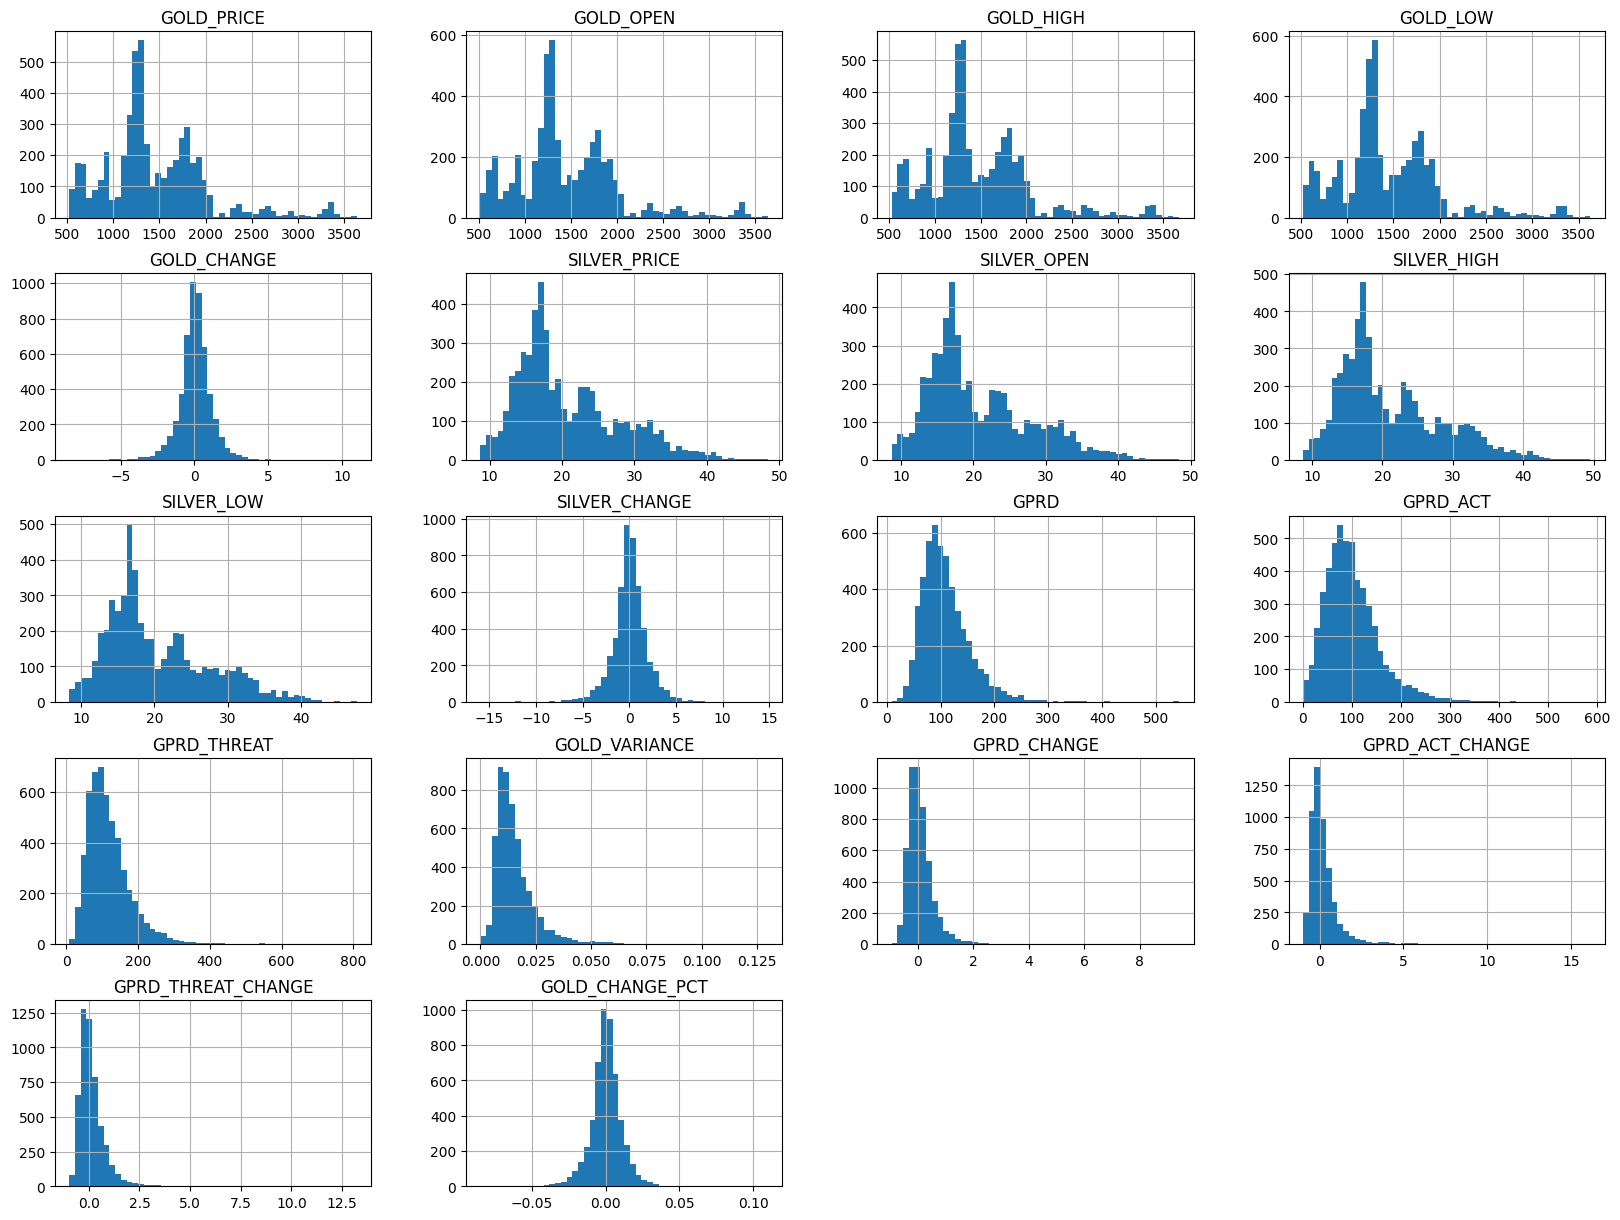

In [10]:
df.hist(bins=50,figsize=(20,15))

In [11]:
""" fig = go.Figure()
fig.add_trace(go.Scatter(x=df.DATE, y=df.GOLD_CHANGE,
                    mode='lines',
                    name='Gold Change'))
fig.add_trace(go.Scatter(x=df.DATE, y=df.GPRD_CHANGE,
                    mode='lines',
                    name='GPRD Change'))
fig.show() """

" fig = go.Figure()\nfig.add_trace(go.Scatter(x=df.DATE, y=df.GOLD_CHANGE,\n                    mode='lines',\n                    name='Gold Change'))\nfig.add_trace(go.Scatter(x=df.DATE, y=df.GPRD_CHANGE,\n                    mode='lines',\n                    name='GPRD Change'))\nfig.show() "

In [12]:
px.scatter(df,df.GOLD_CHANGE_PCT,df.GPRD_CHANGE)

In [13]:
px.scatter(df,df.GOLD_CHANGE_PCT,df.GPRD_ACT_CHANGE)

In [14]:
px.scatter(df,df.GOLD_CHANGE,df.GPRD_THREAT_CHANGE)

In [15]:
px.scatter(df,df.index,df.GOLD_CHANGE_PCT)

In [16]:
px.scatter(df,df.GOLD_VARIANCE,df.GPRD_THREAT_CHANGE)

In [17]:
""" fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df.GOLD_CHANGE,
                    mode='lines',
                    name='Gold Change'))
fig.add_trace(go.Scatter(x=df.index, y=df.GPRD_THREAT_CHANGE,
                    mode='lines',
                    name='GPRD Change'))
fig.show() """

" fig = go.Figure()\nfig.add_trace(go.Scatter(x=df.index, y=df.GOLD_CHANGE,\n                    mode='lines',\n                    name='Gold Change'))\nfig.add_trace(go.Scatter(x=df.index, y=df.GPRD_THREAT_CHANGE,\n                    mode='lines',\n                    name='GPRD Change'))\nfig.show() "

Adding OFR Financial Stress Index

In [18]:
fsi = pd.read_csv('data/fsi.csv',parse_dates=["Date"], index_col="Date")
fsi.head()

,OFR FSI,Credit,Equity valuation,Safe assets,Funding,Volatility,United States,Other advanced economies,Emerging markets
Date,,,,,,,,,
2000-01-03,2.140,0.540,-0.051,0.670,0.472,0.509,1.769,0.521,-0.150
2000-01-04,2.421,0.604,0.079,0.627,0.550,0.561,2.084,0.474,-0.137
2000-01-05,2.297,0.575,0.080,0.653,0.501,0.488,2.023,0.406,-0.132
2000-01-06,2.292,0.546,0.082,0.581,0.566,0.517,2.064,0.355,-0.127
2000-01-07,2.005,0.662,-0.011,0.519,0.565,0.270,1.769,0.367,-0.131


In [19]:
fsi = fsi.loc['2006-01-01':]

In [20]:
fsi.describe()

,OFR FSI,Credit,Equity valuation,Safe assets,Funding,Volatility,United States,Other advanced economies,Emerging markets
count,4988.000000,4988.000000,4988.000000,4988.000000,4988.000000,4988.000000,4988.000000,4988.000000,4988.000000
mean,-0.240919,0.124712,-0.068069,-0.035742,0.088657,-0.350481,-0.191106,-0.031708,-0.018132
std,4.366447,1.414447,0.511528,0.247628,1.167318,1.538946,1.866007,2.182126,0.418184
min,-5.334000,-1.789000,-1.389000,-0.556000,-1.512000,-2.597000,-2.008000,-2.691000,-0.861000
25%,-2.824000,-0.604678,-0.336000,-0.234000,-0.510000,-1.363000,-1.224250,-1.432000,-0.195000
50%,-1.448500,-0.172000,-0.151000,-0.080500,-0.210000,-0.588000,-0.737500,-0.588000,-0.069000
75%,0.686500,0.341846,0.076000,0.118000,0.117250,0.206250,0.034933,0.614250,0.101000
max,29.320000,8.620000,3.281000,1.267000,9.582000,9.787000,13.279000,14.057000,3.080000


In [21]:
fsi = fsi.drop(['Credit','Equity valuation','Funding','United States','Other advanced economies','Emerging markets'],axis=1)

In [22]:
df = df.drop(['GOLD_OPEN','GOLD_HIGH','GOLD_LOW','SILVER_PRICE','SILVER_OPEN','SILVER_HIGH','SILVER_LOW','SILVER_CHANGE'],axis=1)

In [23]:
merged_df = pd.merge(df, fsi, left_index=True, right_index=True, how="left")

array([[<Axes: title={'center': 'GOLD_PRICE'}>,
        <Axes: title={'center': 'GOLD_CHANGE'}>,
        <Axes: title={'center': 'GPRD'}>,
        <Axes: title={'center': 'GPRD_ACT'}>],
       [<Axes: title={'center': 'GPRD_THREAT'}>,
        <Axes: title={'center': 'GOLD_VARIANCE'}>,
        <Axes: title={'center': 'GPRD_CHANGE'}>,
        <Axes: title={'center': 'GPRD_ACT_CHANGE'}>],
       [<Axes: title={'center': 'GPRD_THREAT_CHANGE'}>,
        <Axes: title={'center': 'GOLD_CHANGE_PCT'}>,
        <Axes: title={'center': 'OFR FSI'}>,
        <Axes: title={'center': 'Safe assets'}>],
       [<Axes: title={'center': 'Volatility'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

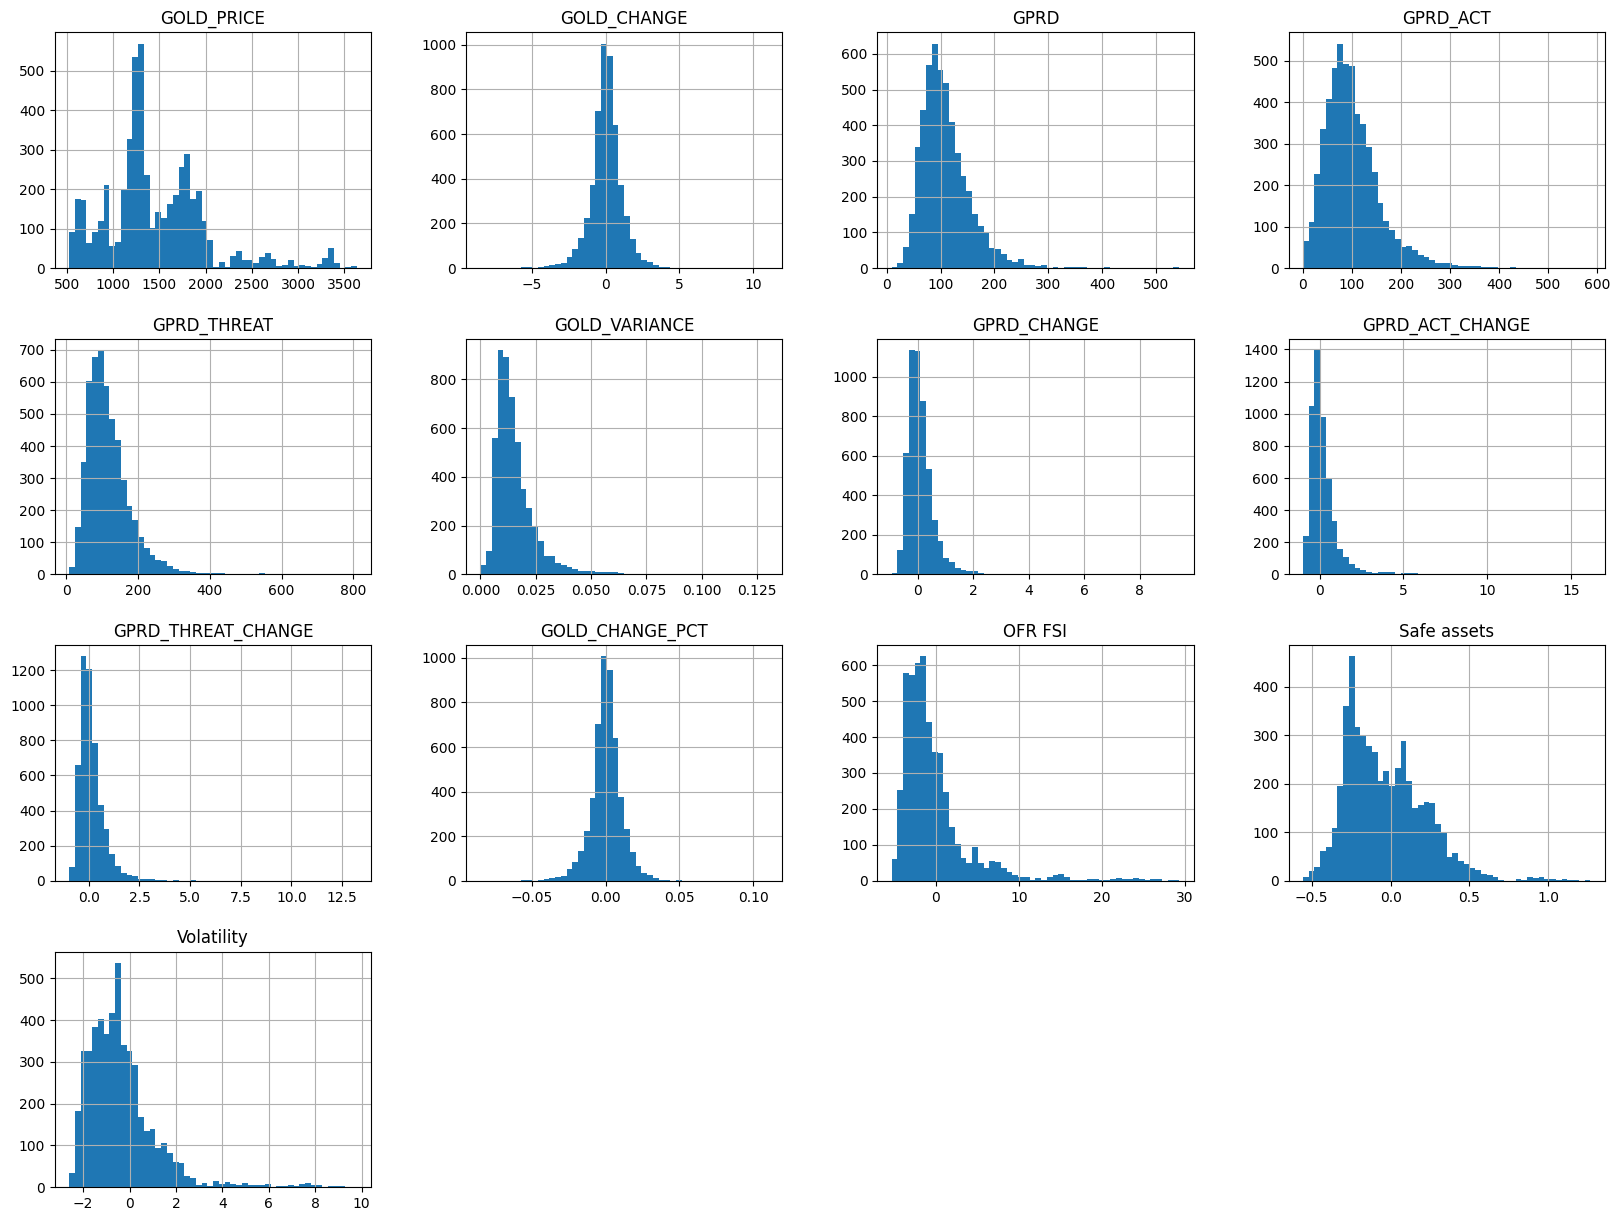

In [24]:
merged_df.hist(bins=50,figsize=(20,15))
